In [1]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from sklearn.manifold import TSNE

In [3]:
df = pd.read_csv('datos_procesados_2.csv')

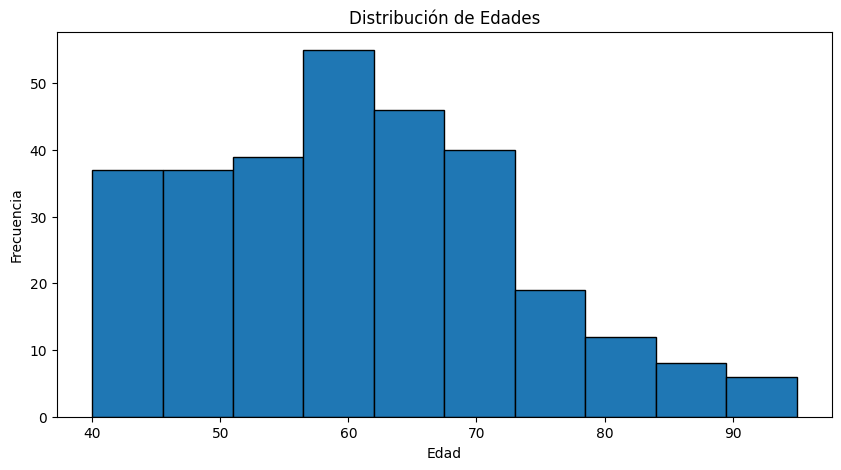

In [4]:
#Parte 7
plt.figure(figsize=(10,5))
plt.hist(df['age'], bins=10, edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

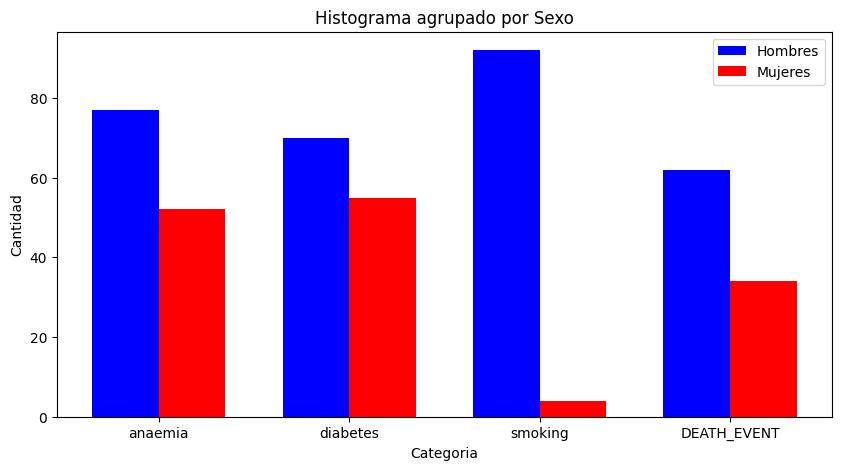

In [6]:
#Parte 7
condiciones = ['anaemia', 'diabetes', 'smoking', 'DEATH_EVENT']
num_condiciones = len(condiciones)
width = 0.35  

fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(num_condiciones)

color_hombres = 'blue'
color_mujeres = 'red'

for i, condicion in enumerate(condiciones):
    hombres = df[(df['sex'] == 1) & (df[condicion] == 1)].shape[0]
    mujeres = df[(df['sex'] == 0) & (df[condicion] == 1)].shape[0]
    ax.bar(x[i] - width/2, hombres, width, color=color_hombres, label='Hombres' if i == 0 else "")
    ax.bar(x[i] + width/2, mujeres, width, color=color_mujeres, label='Mujeres' if i == 0 else "")

ax.set_xlabel('Categoria')
ax.set_ylabel('Cantidad')
ax.set_title('Histograma agrupado por Sexo')
ax.set_xticks(x)
ax.set_xticklabels(condiciones)
ax.legend()

plt.show()

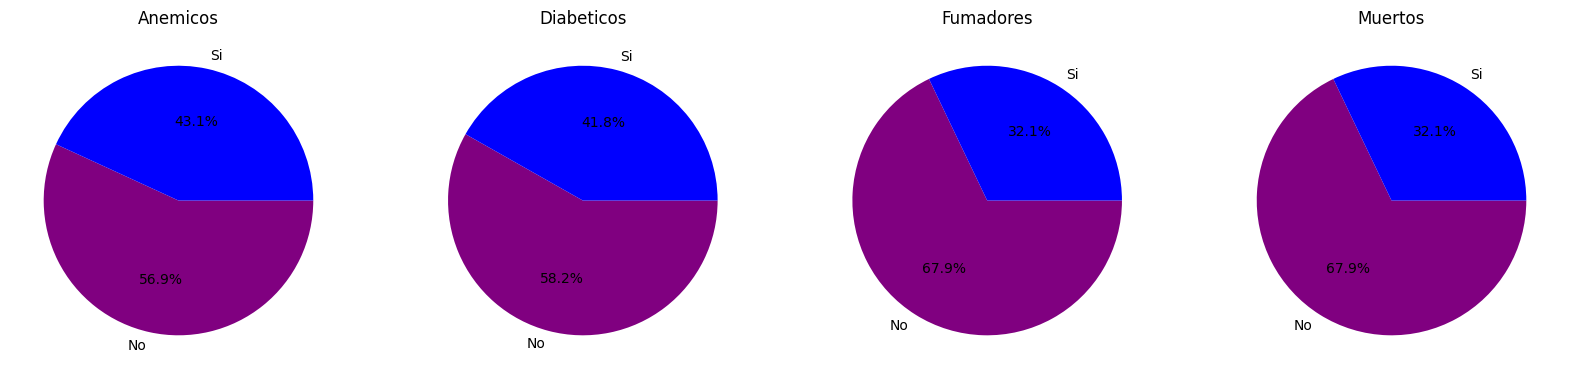

In [7]:
#Parte 8

labels = ['No', 'Si']
colores = ['purple', 'blue']  

plt.figure(figsize=(20,8))

plt.subplot(1, 4, 1)
plt.pie(df['anaemia'].value_counts(), labels=labels, colors=colores, autopct='%1.1f%%', counterclock=False)
plt.title('Anemicos')

plt.subplot(1, 4, 2)
plt.pie(df['diabetes'].value_counts(), labels=labels, colors=colores, autopct='%1.1f%%', counterclock=False)
plt.title('Diabeticos')

plt.subplot(1, 4, 3)
plt.pie(df['smoking'].value_counts(), labels=labels, colors=colores, autopct='%1.1f%%', counterclock=False)
plt.title('Fumadores')

plt.subplot(1, 4, 4)
plt.pie(df['DEATH_EVENT'].value_counts(), labels=labels, colors=colores, autopct='%1.1f%%', counterclock=False)
plt.title('Muertos')

plt.show()

In [8]:
#Parte 9
df = pd.read_csv('https://huggingface.co/datasets/mstz/heart_failure/raw/main/heart_failure_clinical_records_dataset.csv')

X = df.drop(columns=['DEATH_EVENT']).values

y = df['DEATH_EVENT'].values

X_embedded = TSNE(
    n_components=3,
    learning_rate='auto',
    init='random',
    perplexity=3
).fit_transform(X)


df_embedded = pd.DataFrame(X_embedded, columns=['Componente 1', 'Componente 2', 'Componente 3'])
df_embedded['DEATH_EVENT'] = y

death_colors = ['#FF0000', '#00FF00', '#0000FF']

fig = px.scatter_3d(df_embedded, x='Componente 1', y='Componente 2', z='Componente 3', color='DEATH_EVENT', color_continuous_scale=death_colors)
fig.show()